## Observations and Insights 

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files

study_results_path = "data/Study_results.csv"
mouse_metadata_path = "data/Mouse_metadata.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [18]:
# Combine the data into a single dataset
combine_df = pd.merge(study_results, mouse_metadata, how="outer", on="Mouse ID")
    
# Display the data table for preview

combine_df.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0           45.000000                 0    Capomulin   
1     b128          5           45.651331                 0    Capomulin   
2     b128         10           43.270852                 0    Capomulin   
3     b128         15           43.784893                 0    Capomulin   
4     b128         20           42.731552                 0    Capomulin   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1  Female           9          22  
2  Female           9          22  
3  Female           9          22  
4  Female           9          22

In [19]:
total= combine_df['Mouse ID'].nunique()
total

249

In [20]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = combine_df.loc[combine_df.duplicated(['Mouse ID', 'Timepoint'])]

duplicate_df

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
861     g989          0           45.000000                 0     Propriva   
863     g989          5           47.570392                 0     Propriva   
865     g989         10           49.880528                 0     Propriva   
867     g989         15           53.442020                 0     Propriva   
869     g989         20           54.657650                 1     Propriva   

        Sex  Age_months  Weight (g)  
861  Female          21          26  
863  Female          21          26  
865  Female          21          26  
867  Female          21          26  
869  Female          21          26

In [21]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_id=combine_df['Mouse ID']=='g989'
combine_df[dup_id]


Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
860     g989          0           45.000000                 0     Propriva   
861     g989          0           45.000000                 0     Propriva   
862     g989          5           48.786801                 0     Propriva   
863     g989          5           47.570392                 0     Propriva   
864     g989         10           51.745156                 0     Propriva   
865     g989         10           49.880528                 0     Propriva   
866     g989         15           51.325852                 1     Propriva   
867     g989         15           53.442020                 0     Propriva   
868     g989         20           55.326122                 1     Propriva   
869     g989         20           54.657650                 1     Propriva   
870     g989         25           56.045564                 1     Propriva   
871     g989         30           59.082294                 1     Propriva   
872     g989         35           62.570880                 2     Propriva   

        Sex  Age_months  Weight (g)  
860  Female          21          26  
861  Female          21          26  
862  Female          21          26  
863  Female          21          26  
864  Female          21          26  
865  Female          21          26  
866  Female          21          26  
867  Female          21          26  
868  Female          21          26  
869  Female          21          26  
870  Female          21          26  
871  Female          21          26  
872  Female          21          26

In [22]:
#Creating a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combine_df.loc[combine_df['Mouse ID'] != 'g989']
clean_df.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0           45.000000                 0    Capomulin   
1     b128          5           45.651331                 0    Capomulin   
2     b128         10           43.270852                 0    Capomulin   
3     b128         15           43.784893                 0    Capomulin   
4     b128         20           42.731552                 0    Capomulin   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1  Female           9          22  
2  Female           9          22  
3  Female           9          22  
4  Female           9          22

In [23]:
# Checking the number of mice.
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grp = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
# This method is the most straighforward, creating multiple series and putting them all together at the end.
grp_df=pd.DataFrame({'Mean Tumor Volume':grp.mean(),'Median Tumor Volume':grp.median(),'Tumor Volume Variance':grp.var(),'Tumor Volume Std. Dev.':grp.std(),'Tumor Volume Std. Err.':grp.sem()})
grp_df

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

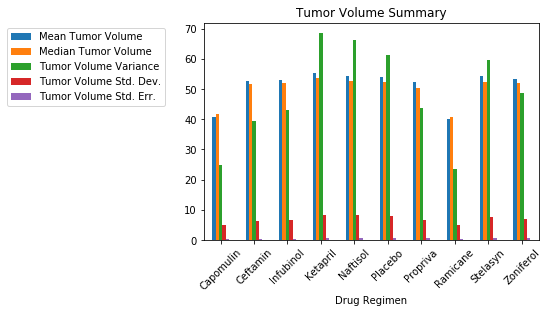

In [25]:
grp_df.plot(kind="bar", rot=45)
plt.title("Tumor Volume Summary")
plt.legend(loc='upper right', bbox_to_anchor=(-0.1, 1))


In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grp.agg(['mean','median','var','std','sem'])
# This method produces everything in a single groupby function


mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

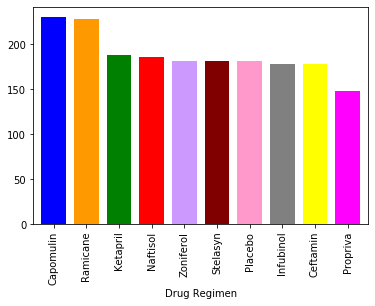

In [27]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas
# clean_sort=clean_df['Tumor Volume (mm3)'].sort_values(ascending=False)
# clean_sort


mouse_data_treatment = clean_df.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
mouse_1=mouse_data_treatment.sort_values(ascending=False)
mouse_1.plot(kind="bar", rot=90,width = 0.75,color=['blue', '#FF9900', 'green', 'red', '#CC99FF',
                    '#800000', '#FF99CC', '#808080', '#FFFF00', '#FF00FF'])

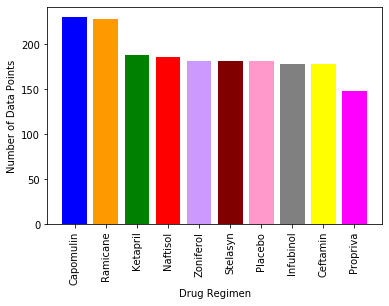

In [28]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

mouse_2 = pd.DataFrame({"Tumor Volume (mm3)":mouse_1
                      })
x_axis = np.arange(len(mouse_2))
tick_locations = [value for value in x_axis]
plt.ylabel('Number of Data Points')
plt.xlabel('Drug Regimen')
plt.bar(x_axis, mouse_2["Tumor Volume (mm3)"], align="center",color=['blue', '#FF9900', 'green', 'red', '#CC99FF',
                    '#800000', '#FF99CC', '#808080', '#FFFF00', '#FF00FF'])
plt.xticks(tick_locations, mouse_2.index, rotation="vertical")

plt.show()

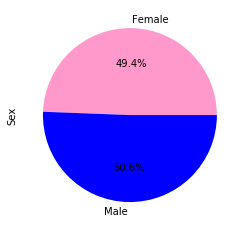

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pandascolors = ['#FF99CC','blue']
gender_data = combine_df.groupby("Sex")["Mouse ID"].count()
counts = pd.DataFrame({"Sex":gender_data})
colors = ['#FF99CC','blue']

counts.plot.pie(y='Sex',autopct='%1.1f%%',colors=colors,legend=False)

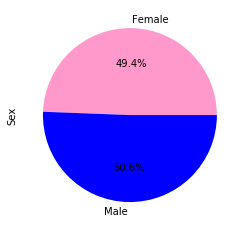

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes = counts['Sex']
plt.pie(sizes,colors=['#FF99CC','blue'], labels=['Female','Male'], autopct='%1.1f%%' )
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#top_regimen = combine_df[combine_df['Drug Regimen'].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Start by getting the last (greatest) timepoint for each mouse
top_regimen_sort = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
top_regimen_sort = top_regimen_sort.reset_index()
top_regimen_sort
#clean_df


# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Final_data = pd.merge(top_regimen_sort,clean_df,on=["Mouse ID","Timepoint"],how="right" )
Final_data

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        a203         45           67.973419                 2    Infubinol   
1        a251         45           65.525743                 1    Infubinol   
2        a262         45           70.717621                 4      Placebo   
3        a275         45           62.999356                 3     Ceftamin   
4        a366         30           63.440686                 1     Stelasyn   
...       ...        ...                 ...               ...          ...   
1875     m601         20           34.255732                 1    Capomulin   
1876     m601         25           33.118756                 1    Capomulin   
1877     m601         30           31.758275                 1    Capomulin   
1878     m601         35           30.834357                 1    Capomulin   
1879     m601         40           31.378045                 1    Capomulin   

         Sex  Age_months  Weight (g)  
0     Female          20          23  
1     Female          21          25  
2     Female          17          29  
3     Female          20          28  
4     Female          16          29  
...      ...         ...         ...  
1875    Male          22          17  
1876    Male          22          17  
1877    Male          22          17  
1878    Male          22          17  
1879    Male          22          17  

[1880 rows x 8 columns]

In [37]:
# Put treatments into a list for for loop (and later for plot labels) 
treatment_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []
for drug in treatment_list:  
    #Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = Final_data.loc[Final_data["Drug Regimen"]==drug,"Tumor Volume (mm3)"]

    #add subset
    tumor_volume_data.append(final_tumor_volume)

    #Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quantiles = final_tumor_volume.quantile([.25,.5,.75])
    Q1 = quantiles[0.25]
    Q3 = quantiles[0.75] 
    IQR = Q3 - Q1

    #print(f"The lower quartile of tumor voume is: {Q1}")
    #print(f"The upper quartile of tumor voume is: {Q3}")
    #print(f"The interquartile range of tumor voume is: {IQR}")
    #print(f"The median quartile of tumor voume is: {quartiles{0.5}}")


    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - (1.5*IQR)
    upper_bound = Q3 - (1.5*IQR)
    # print (f"Values below {lower_bound} could be outliers.")
    # print (f"Values below {upper_bound} could be outliers.")
    outlier_tumor = final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume>upper_bound)]  
    #print(f"outlier(outlier_tumor)")                                     



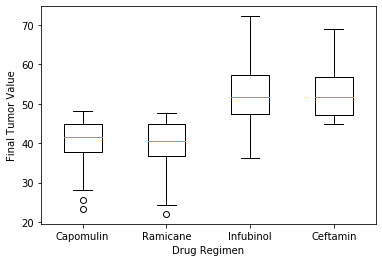

In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_volume_data,labels=treatment_list)
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Value')
plt.show()


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = combine_df.loc[combine_df['Drug Regimen'] == 'Capomulin']
forline_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]
forline_df.head()

In [ ]:
x_axis_timepoint = forline_df['Timepoint']
tumor_size = forline_df['Tumor Volume (mm3)']

plt.plot(x_axis_timepoint, tumor_size)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment for Mouse id l509')
plt.savefig('Mouse_LineChart_Capomulin_i738')
plt.show()

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_average = capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Capomulin Treatment Tumor and Weight Relation')
plt.tight_layout()
plt.savefig('Scatter_Plot_Weight_TumorVolume')
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
correlation=round(st.pearsonr(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between the mouse weight and average tumor volume is '{correlation}'.")

In [ ]:
(slope, intercept, rvalue, pvalue, stderr)  = st.linregress(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])
y_values = capomulin_average['Weight (g)']*slope+intercept
plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'], y_values, color='red')
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Capomulin Treatment Tumor And Weight Relation')
#plt.savefig('Mouse_Weight_TumorVolume_Regression')
plt.show()